# Exploratory Data Analysis

The goal of Exploratory Data Analysis or EDA is to **gain an understanding of your data**. 

Upon first getting some data, you'll want to know more about what each variable represents and how the data is formatted. You may want to graph and visualize your data to find any patterns that might be lurking within it. You also want to look for any missing data, see how prevalent it is, and decide what to do about it.  

Each section below will walk you through what to do in order to begin understanding your data, and you'll complete the following steps:
* Mount data from Trove (again)
* Answer Andy's (and ask your own) questions about the data 

You'll see tasks for you to complete tagged as **TASK** in markdown and `##TODOs` in code. 

Let's get started!

> **First TASK**: Write a couple import statements for standard libraries, pandas and numpy.

In [81]:
import turitrove as trove
import matplotlib.pyplot as plt 
import seaborn as sns
import os

## TODO: Write additional import statements for pandas (as pd) and numpy (as np)
import pandas as pd
import numpy as np
import zipfile

---
# Mount the Data

You need data before you can look at it. Your code in this section should mount a battery charging dataset object from Turi Trove on your computer, and load the data file into this notebook.  

>**TASK**: Mount the [aiedu_battery_charging dataset](https://trove.apple.com/dataset/aiedu_battery_charging/1.0.0) from Trove, and read it in as a pandas DataFrame. 

Depending on a few things outside of your control, reading the provided file in as a DataFrame could take 30 seconds or a few minutes; it is a lot of data!


In [21]:
# provided un-mount step 
trove.umount('dataset/aiedu_battery_charging@1.0.0')

## TODO: Mount the dataset
URI = 'dataset/aiedu_battery_charging@1.0.0'
if not os.path.isdir('data'):
    os.makedirs('data')

trove.download(URI, 'data')

dataset/aiedu_battery_charging@1.0.0 is not mounted


/Users/noahgallego/miniconda3/envs/deep-learning-apple/lib/python3.8/site-packages/httpx/_content.py:204: DeprecationWarning: Use 'content=<...>' to upload raw bytes/text content.
  warnings.warn(message, DeprecationWarning)


Download in progress: /Users/noahgallego/Desktop/Apple ML Program/EDA/data/aiedu_battery_charging-1.0.0/data
Download started...
Download completed. Checkout /Users/noahgallego/Desktop/Apple ML Program/EDA/data/aiedu_battery_charging-1.0.0/data for your files


In [31]:
## TODO: Define a path for finding the specific raw data file
zip_path = '/Users/noahgallego/Desktop/Apple ML Program/EDA/data/aiedu_battery_charging-1.0.0/data/raw.zip'
base = '/Users/noahgallego/Desktop/Apple ML Program/EDA/data/aiedu_battery_charging-1.0.0/data'
data_path = base + '/raw/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(data_path)

data_path += os.listdir(data_path)[0]

## TODO: Read in the path as a pandas dataframe or turicreate SFrame
df = pd.read_csv(data_path)

In [32]:
df.head()

,start,end,stream,value,user_id
0,2020-03-03 00:00:00,2020-03-03 00:13:00,/device/batteryPercentage,73.0,cd8014ee-5e62-4e41-9c24-de50178b4a97
1,2020-03-03 00:13:00,2020-03-03 00:26:00,/device/batteryPercentage,72.0,cd8014ee-5e62-4e41-9c24-de50178b4a97
2,2020-03-03 00:26:00,2020-03-03 00:26:00,/device/batteryPercentage,71.0,cd8014ee-5e62-4e41-9c24-de50178b4a97
3,2020-03-03 00:26:00,2020-03-03 00:27:00,/device/batteryPercentage,70.0,cd8014ee-5e62-4e41-9c24-de50178b4a97
4,2020-03-03 00:27:00,2020-03-03 00:27:00,/device/batteryPercentage,69.0,cd8014ee-5e62-4e41-9c24-de50178b4a97


If your code ran without any errors, congrats, you should have a DataFrame to explore and work with!

---
# Initial Explorations


The first thing you want to do is get eyes on your data, see how big your dataset is, and start getting a feel for it. You'll do that in these first few cells.  

> **TASK**: Use `.shape` and `.head()` to get the very first understandings of your data: how big is it, and what does it look like.

In [34]:
## TODO: Print the shape and a few rows of the df 
df.shape
df.head()

,start,end,stream,value,user_id
0,2020-03-03 00:00:00,2020-03-03 00:13:00,/device/batteryPercentage,73.0,cd8014ee-5e62-4e41-9c24-de50178b4a97
1,2020-03-03 00:13:00,2020-03-03 00:26:00,/device/batteryPercentage,72.0,cd8014ee-5e62-4e41-9c24-de50178b4a97
2,2020-03-03 00:26:00,2020-03-03 00:26:00,/device/batteryPercentage,71.0,cd8014ee-5e62-4e41-9c24-de50178b4a97
3,2020-03-03 00:26:00,2020-03-03 00:27:00,/device/batteryPercentage,70.0,cd8014ee-5e62-4e41-9c24-de50178b4a97
4,2020-03-03 00:27:00,2020-03-03 00:27:00,/device/batteryPercentage,69.0,cd8014ee-5e62-4e41-9c24-de50178b4a97


## Data formatting

> **TASK**: Check the data formats, using the `.dtypes` attribute for a DataFrame. Look for types that don't seem to match up with what you see in each data column.  

Examples of unexpected types would be:
* Data that appears to be numbers (like float values or integers) but is *typed* as a generic object or string variable  
* Date-time values that are typed as objects or strings (instead of as date-time stamps)

These are some of most common unexpected types, but almost anything can happen with data, so note anything that you have questions about.  

In [35]:
## TODO: Identify the type of data in each column, what seems right or wrong?
df.dtypes

start       object
end         object
stream      object
value      float64
user_id     object
dtype: object

To reformat your data into the types that you want and expect, `pandas` offers several conversion functions, such as `to_datetime()` and `to_numeric()`. You can find common conversions in the [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html). 

One such conversion is provided for you, in the code cell below. 

You can also choose to *re-read* in your data with `pd.read_csv()` where you can specify _how_ you want individual columns read-in as. To see an example of this, please refer to the **EDA for Household Power Prediction** notebook.

### Convert to work with numeric values and date-times

For the explorations and transformations you'll need to do, it is important that the `start` and `end` dates be date time objects and that the `value` column be a numeric type like a float value. We won't need to do string operations on the `stream` or `user_id` columns, so those can be generic objects or string variables. 

> **TASK**: Convert or read in the data such that dates and numeric values are correctly typed. After conversion, you can check your work with another call to the `.dtypes` attribute for a DataFrame. This should print out something similar to the following:

```
start      datetime64[ns]
end        datetime64[ns]
stream             object
value             float64
user_id            object
dtype: object
```


In [36]:
# assumes your DataFrame is named df and converts the start column to a date-time stamp
df['start']= pd.to_datetime(df['start'])
df['end'] = pd.to_datetime(df['end'])

## TODO: convert other numeric columns to be the type you expect
df['value'] = pd.to_numeric(df['value'])

## TODO: Check your work by called df.dtypes again
df.dtypes

start      datetime64[ns]
end        datetime64[ns]
stream             object
value             float64
user_id            object
dtype: object

---
# Forming & Answering Questions

It is easier to create code to answer **low-level** questions, which are very specific and usually framed in _terms_ of the dataset itself, e.g., in terms of `start` and `end` times or `value` ranges for the battery data.

This section is meant to encourage your creativity and inquisitivity. Start with wonderings and try to translate those questions and thoughts into code. This notebook will have an open end, allowing you to do some exploration of your own before moving on to the next step of dataset creation and feature engineering!

Here are a couple, example questions you might form: What are the range of values that "value" can take? What information indicates when someone's device is plugged in? 

But before you ask questions of your own, let's start with Andy's:

>**TASK(s)**: Using the data exploration and visualizations skills you've learned so far, answer the following questions. You may find it helpful to write down the answers in markdown cells or elsewhere so that you can create a data summary for your team, later on. 

1. How many user devices (id’s) are in this dataset? 
2. Between what range of dates was this data collected?
3. Are there any null or missing values to deal with?
4. How long do users typically charge their devices?
5. What times of day are users most likely to plug in their devices and leave them plugged in for a long time (over 3hrs)? 

**References**: 

* Again, it may be very useful to reference the example EDA notebook provided, **EDA for Household Power**. 
* It also may be useful to look at **[pandas tutorials](https://pandas.pydata.org/docs/getting_started/index.html#intro-to-pandas)** which cover a wide range of topics, including: how to select and filter for specific rows of data,   and how to handle time series data (especially useful for this dataset!)
* Finally, when in doubt, you can always search Stack Overflow or search for answers online with simple queries like, "find unique values pandas"

Some questions can be answered with one line of code, while others may take multiple steps. 

The answer to question 5 is provided for you, as an example, and questions 1-4 are left for you to answer. **The provided example code assumes you have a correctly formatted DataFrame named `df` to work with.** 

### Question 1:
*1. How many user devices (id’s) are in this dataset?*

In [40]:
# Get list of unique devices
unique_user = df['user_id'].unique()
print("The number of unique devices in the dataset are: ", len(unique_user)) 

The number of unique devices in the dataset are:  10150


### Question 2:
*2. Between what range of dates was this data collected?*

In [42]:
# Get earliest and latest date from the dataset
earliest = df['start'].min()
latest = df['end'].max()

print("Our study collects data from devices from ", earliest, " to ", latest, ".")

Our study collects data from devices from  2020-03-02 00:00:00  to  2070-08-30 02:51:00 .


### Question 3:
*3. Are there any null or missing values to deal with?*

In [53]:
# Check for null values
missing = df.isnull().sum()
print("There are no missing values in the dataset: \n", missing)

There are no missing values in the dataset: 
 start      0
end        0
stream     0
value      0
user_id    0
dtype: int64


### Question 4:
*4. How long do users typically charge their devices?*

In [78]:
# Q4: How long do users typically charge their devices?
df['charging_time'] = np.where(df['stream'] == "/device/isPluggedIn",
                               (df['end'] - df['start']).dt.total_seconds() / 60,
                               0)

In [79]:
df.dtypes

start            datetime64[ns]
end              datetime64[ns]
stream                   object
value                   float64
user_id                  object
charging_time           float64
dtype: object

/var/folders/c8/8kf2c39x4599l74dmxjryfvw0000gn/T/ipykernel_68051/617155359.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Status', y='Count', data=charging_status, legend = False, palette = 'pastel')


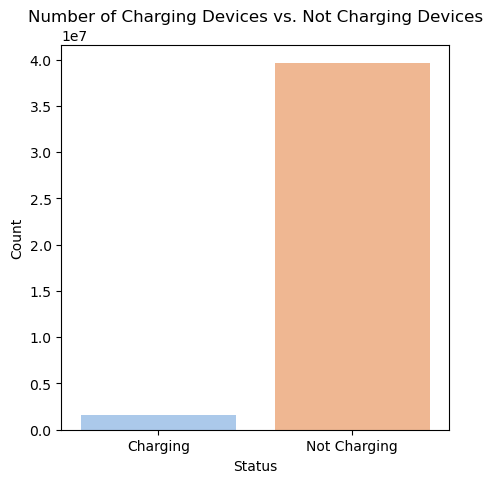

In [98]:
# Print number of iPhones that are charging
charging = (df['charging_time'] != 0).sum()
not_charging = (df['charging_time'] == 0).sum()

# Create a DataFrame for the counts
charging_status = pd.DataFrame({
    'Status': ['Charging', 'Not Charging'],
    'Count': [charging, not_charging]
})

# Set up the plot
plt.figure(figsize=(5, 5))
sns.barplot(x='Status', y='Count', data=charging_status, legend = False, palette = 'pastel')
plt.title("Number of Charging Devices vs. Not Charging Devices")
plt.show()

---
### Example: Q5 

**Q5: What times of day are users most likely to plug in their devices and leave them plugged in for a long time (over 3hrs)?**

The first step is to turn this into a low-level question, where this is reframed in terms of the dataset we have. There are a few things this questions is asking about:
* Looking at times when a user's device is plugged-in and charging, which is indicated by the `stream` column, "/device/isPluggedIn" taking on the `value` of 1
* Select only those instances when a user has kept their device plugged in for _at least_ 3hrs, as indicated by `start` and `end` times of the plug-in event
* Finally, of those long-charge events, find the most common start time, which I'll define as the hr at which someone `start`ed to plug-in their device for a long time.

In [99]:
## Q5 step 1: get rows where a device is plugged in and charging

# selecting by stream and value
plug_in_condition = (df['stream'] == "/device/isPluggedIn") & (df['value'] == 1.0)
plugin_df = df[plug_in_condition].copy()

## Q5 step 2: of plugin events, get events where end - start is >= 3hrs long

# calculate the duration (in minutes) of a plugin event, and add it as a new column
# dt.total_seconds converts an amount of time into seconds and then dividing by 60 gives minutes
plugin_df['duration_mins'] = (plugin_df['end'] - plugin_df['start']).dt.total_seconds() / 60

# selecting by >= 3hr durations
long_charge_condition = plugin_df['duration_mins'] >= 60*3  # 3 hrs in minutes
long_charges = plugin_df[long_charge_condition].copy()

# check work so far, should see only long plugged-in events
long_charges.head()

,start,end,stream,value,user_id,charging_time,duration_mins
71,2020-03-03 07:20:00,2020-03-03 16:59:00,/device/isPluggedIn,1.0,cd8014ee-5e62-4e41-9c24-de50178b4a97,579.0,579.0
195,2020-03-04 07:30:00,2020-03-04 13:30:00,/device/isPluggedIn,1.0,cd8014ee-5e62-4e41-9c24-de50178b4a97,360.0,360.0
332,2020-03-05 07:31:00,2020-03-05 13:28:00,/device/isPluggedIn,1.0,cd8014ee-5e62-4e41-9c24-de50178b4a97,357.0,357.0
513,2020-03-06 07:12:00,2020-03-06 13:44:00,/device/isPluggedIn,1.0,cd8014ee-5e62-4e41-9c24-de50178b4a97,392.0,392.0
840,2020-03-08 07:20:00,2020-03-08 12:27:00,/device/isPluggedIn,1.0,cd8014ee-5e62-4e41-9c24-de50178b4a97,307.0,307.0


### Creating columns

You'll notice that above, I created a column to record the duration of a plugged-in charge event. In general, creating columns that hold simple calculations or extracted information made from other variables in the dataset is a great way to explore and answer more complicated questions about this data. 

One useful thing to know about date-time stamps is that you can extract information like the hour, day, whether a time stamp falls on a weekend, and more with the use of date-time properties. 

I extract the hr (0-23) of the `start` times of long charge events, below, where 0 corresponds to midnight and 23 to 11pm.

(array([ 9217.,  6383.,  5168.,  4604.,  4086.,  4008.,  3786.,  3930.,
         3981.,  3831.,  3990.,  4358.,  5015.,  6284.,  7536.,  9028.,
         9041.,  7318.,  5843.,  5285.,  5756.,  7416., 10989., 13005.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

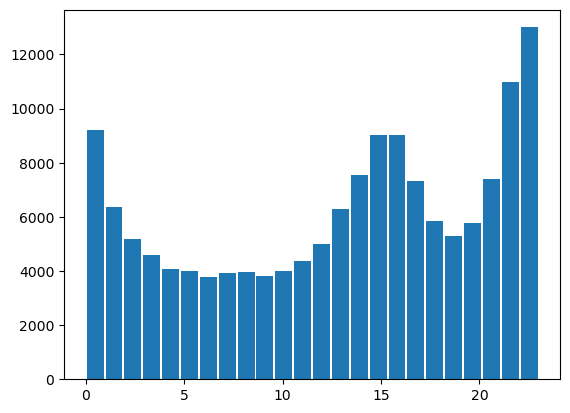

In [100]:
## Q5 step 3: of the long charge events, find the most common start hr

# first extract the starting hr and save in a column
long_charges['start_hr'] = long_charges['start'].dt.hour

## the most common start hr can then be described in a few ways, 
# by descriptive statistics like the mode (the value that appears most often)
# or by visualizing the distribution of start times in a histogram

# histogram: note that in the 0-23 hr range, 0 corresponds to midnight and 23 to 11pm
# where do you notice spikes in long-charge start times?
plt.hist(long_charges['start_hr'], bins=24, rwidth=0.9) # 24 bins for 24 hrs, 0.9 spacing for visual distinction

**Q5 Answer**: It looks like the most common start hrs for people who charge their devices for a long time (>= 3hrs) are at night time, with the largest histogram peaks happening between hrs 22-23, and 0 or between 10pm and midnight, suggesting long, overnight charges!

There is another smaller peak in the afternoon, around hr 15, so around 3 or 4pm, which is interesting.

---

Next, it is up to you to answer the rest of Andy's questions!

# Save Your Work!

**Before you go!**

After exploration, your next steps will be to create, specific features you'll use to train an ML model. If there are features you've created for this data that you would like to persist, **make sure you save your work**. 

> That means `Cmd+S` your current notebook AND save your current data, if you think it will be useful—for example, it will be useful to work with _only_ plugged-in, charging events and have a column that records the duration of those charges. I usually save my working data in a `data/` folder that I create in the same place that I work with notebooks. It's a good idea to give your data files descriptive names for reference.

> Once you've saved your data, this would be a good point to **unmount** `umount()` the Trove data, if you are done working with it.

It's suggested that you save in binary, pickle format because that will be much faster than, say, a CSV format, plus this format has the added bonus of saving any formatting changes you've done.

If you need to change the file path in the commented code below, feel free to do so.  

Later, we'll be using `read_pickle()` from the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_pickle.html) to read in binary data. 

In [ ]:
## (Optional) TODO: Save your data, if you have features you want to persist

## (Optional) TODO: Unmount your trove data by URI if you are done working with it

# uncomment and modify the code below to save your dataframe (e.g. plugin_df) to a specific directory (like data/)
# plugin_df.to_pickle('~/data/plugin_events.pkl')